NumPy is not using Intel MKL.
Training time: 0.3918 seconds
Accuracy: 0.6797
Precision: 0.6071
Recall: 0.2125
F1-score: 0.3148


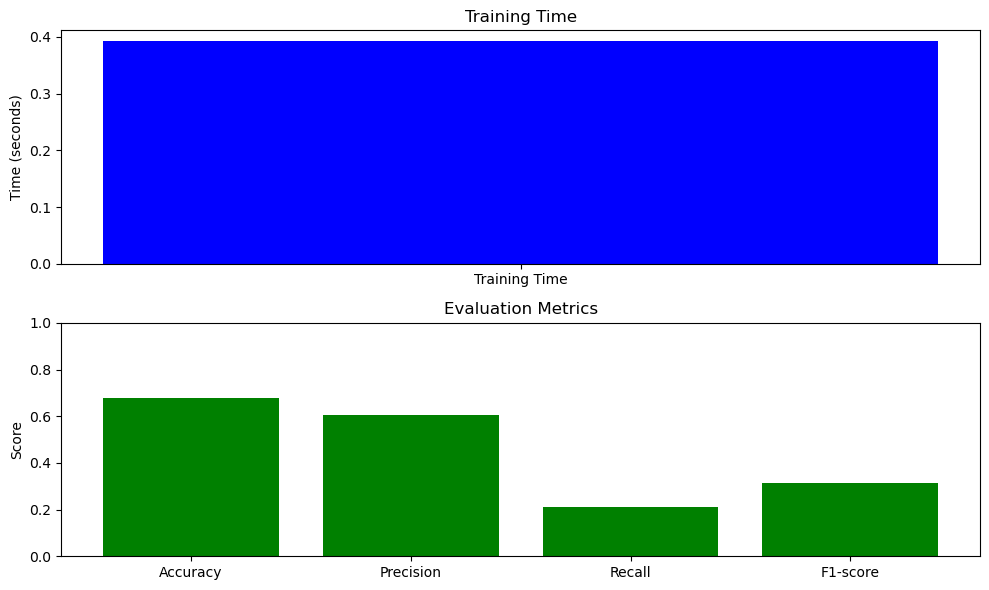

In [1]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Check if NumPy is using Intel MKL
def check_mkl():
    if np.__config__.get_info('blas_mkl_info'):
        print("NumPy is using Intel MKL.")
    else:
        print("NumPy is not using Intel MKL.")

check_mkl()

# Load dataset
data = pd.read_csv('/Users/karanpandre/Documents/INTERNSHIP/HPC /1/1/7/24(N shivkumar)/24/diabetes.csv')

# Assuming 'Outcome' is the target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome'].values.reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Neural network class
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)

    def forward(self, X):
        # Forward pass
        self.hidden_input = np.dot(X, self.weights_input_hidden)
        self.hidden_output = sigmoid(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output)
        self.final_output = sigmoid(self.final_input)
        return self.final_output

    def backward(self, X, y, output):
        # Backward pass
        self.error = y - output
        self.output_delta = self.error * sigmoid_derivative(output)
        
        self.hidden_error = self.output_delta.dot(self.weights_hidden_output.T)
        self.hidden_delta = self.hidden_error * sigmoid_derivative(self.hidden_output)

        # Update weights
        self.weights_hidden_output += self.hidden_output.T.dot(self.output_delta)
        self.weights_input_hidden += X.T.dot(self.hidden_delta)

    def train(self, X, y, epochs=10000):
        start_time = time.time()
        for _ in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
        end_time = time.time()
        training_time = end_time - start_time
        print(f"Training time: {training_time:.4f} seconds")
        return training_time

# Create and train the neural network
nn = SimpleNeuralNetwork(input_size=X_train.shape[1], hidden_size=5, output_size=1)
training_time = nn.train(X_train, y_train)

# Evaluate the model
def evaluate_model(nn, X_test, y_test):
    predictions = nn.forward(X_test)
    predictions = np.round(predictions)  # Convert probabilities to binary predictions
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = evaluate_model(nn, X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Plot the evaluation metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}
metrics_names = list(metrics.keys())
metrics_values = list(metrics.values())

plt.figure(figsize=(10, 6))

# Plot training time
plt.subplot(2, 1, 1)
plt.bar(['Training Time'], [training_time], color='blue')
plt.ylabel('Time (seconds)')
plt.title('Training Time')

# Plot evaluation metrics
plt.subplot(2, 1, 2)
plt.bar(metrics_names, metrics_values, color='green')
plt.ylabel('Score')
plt.title('Evaluation Metrics')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()
